<a href="https://colab.research.google.com/github/SrVladyslav/proves/blob/master/Python/COURSES/tensorflow/CNN_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basically, Convolutional Neural Networks is your best friend to <b>automatically do Feature Engineering</b> (Feature Learning) without wasting too much time creating your own codes and with no prior need of expertise in the field of Feature Engineering.
<br>

<img src="https://ibm.box.com/shared/static/urzzkc7o5loqrlezcvn4kr594mxi9ftx.png" alt="HTML5 Icon" style="width: 650px; height: 250px;">
<center> 
    Example of feature learning (automatically feature engineering), starting with simple features and ending with high-level features like human faces. <a href="https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/">ref</a> 
</center> 

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


<a id="ref2"></a>
<h2>Understanding and coding with Python</h2>
<h3>Convolution: 1D operation with Python (Numpy/Scipy)</h3>
<h4>Mathematical notation</h4>
In this first example, we will use the pure mathematical notation. Here we have a one dimensional convolution operation. Lets say h is our image and x is our kernel: 
  
x[i] = { 3, 4, 5 }  
h[i] = { 2, 1, 0 }  

where i = index

To use the convolution operation between the two arrays try the code below to see how easy it is to do in Python.

In [0]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]
 

y = np.convolve(x, h)
y  

array([ 6, 11, 14,  5,  0])

sliding x window over h:
<ul>
    <li>6  = 2 * 3 :            
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\ 
        \begin{bmatrix}
             2 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
    <li>11 = 1 * 3 + 2 * 4 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             1 & 2 & 0 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>14 = 0 * 3 + 1 * 4 + 2 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 1 & 2 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>5  = 0 * 4 + 1 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 1 \\
        \end{bmatrix}
        $ 
    </li>
    <li>0  = 0 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
</ul>

<hr>

<h4> Now we are going to verify what Python did, because we don't trust computer outputs while we are learning. Using the equation of convolution for y[n]:</h4>
  
$$y[n] = \sum\limits_{k\to-\infty}^\infty x[k] \cdot h[n-k] $$


And then, manually executing computation:

$ 
y[0]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[0-k]= x[0]\cdot h[0]=3\cdot 2=6 \\
y[1]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[1-k]= x[0]\cdot h[1-0]+x[1]\cdot h[1-1] + \space... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[1] + x[1]\cdot h[0]= 3\cdot1+4\cdot 2=11 \\
y[2]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[2-k]= x[0]\cdot h[2-0]+x[1]\cdot h[2-1]+x[2]\cdot h[2-2]+ \space ... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[2] + x[1]\cdot h[1]+x[2]\cdot h[0]= 3\cdot0+4\cdot 1 +5\cdot 2=14 \\
y[3]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[3-k]= x[0]\cdot h[3-0]+x[1]\cdot h[3-1]+x[2]\cdot h[3-2]+ x[3]\cdot h[3-3] + \space... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[3] +x[1]\cdot h[2] + x[2]\cdot h[1]+x[3]\cdot h[0]=0+0+5 \cdot 1 +0=5 \\
y[4]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[4-k]= x[0]\cdot h[4-0]+x[1]\cdot h[4-1]+x[2]\cdot h[4-2]+\space... =0\\ 
$

In [0]:
print("Compare with the following values from Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0], y[1], y[2], y[3], y[4])) 

Compare with the following values from Python: y[0] = 6 ; y[1] = 11; y[2] = 14; y[3] = 5; y[4] = 0


There are three methods to apply kernel on the matrix, <b>with padding (full)</b>, <b>with padding(same)</b> and <b>without padding(valid)</b>:  

</h3>1) Visually understanding the operation with padding (full)</h3>

Lets think of the kernel as a sliding window. We have to come with the solution of padding zeros on the input array. This is a very famous implementation and will be easier to show how it works with a simple example, consider this case:
  
x[i] = [6,2]  
h[i] = [1,2,5,4]  
Using the zero padding, we can calculate the convolution.
 
You have to invert the filter x, otherwise the operation would be cross-correlation.
First step, (now with zero padding): 

There are three methods to apply kernel on the matrix, <b>with padding (full)</b>, <b>with padding(same)</b> and <b>without padding(valid)</b>:  

</h3>1) Visually understanding the operation with padding (full)</h3>

Lets think of the kernel as a sliding window. We have to come with the solution of padding zeros on the input array. This is a very famous implementation and will be easier to show how it works with a simple example, consider this case:
  
x[i] = [6,2]  
h[i] = [1,2,5,4]  
Using the zero padding, we can calculate the convolution.
 
You have to invert the filter x, otherwise the operation would be cross-correlation.
First step, (now with zero padding): 

In [0]:
[2  6]
 |  |
 V  V
 0 [1 2 5 4]

In [0]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full")  #now, because of the zero padding, the final dimension of the array is bigger
y  

array([ 6, 14, 34, 34,  8])

In [0]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")  # it is same as zero padding, but with returns an ouput with the same length as max of x or h
y  

array([ 6, 14, 34, 34])

In [0]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")   # valid returns output of length max(x, h) - min(x, h) + 1, this is to ensure that values outside of the boundary of 
                                # h will not be used in the calculation of the convolution
                                # in the next example we will understand why we used the argument valid
y  

array([14, 34, 34])

The 2D convolution operation is defined as:

<font size="4">$$ I'= \sum\limits_{u,v} I(x-u,y-v)g(u,v) $$ </font> 
 
 
Below we will apply the equation to an image represented by a 3x3 matrix according to the function g = (-1 1). Please note that when we apply the kernel we always use its inversion. 
 
$
I=
\begin{bmatrix}
     255          & 7      & 3     \\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$ 

$
g=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$ 
  
$
\begin{bmatrix}
    \textbf{1}\cdot \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \textbf{1}\ast \textbf{255}      & \textbf{-1} \ast \textbf{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \textbf{248}      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \textbf{1}\ast\textbf{7}  & \textbf{-1}\ast\textbf{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \textbf{4}     \\
    212            & 240      & 4     \\
    218            & 216      & 230
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \textbf{1}\ast \textbf{0}    & \textbf{-1} \ast \textbf{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 248    & 4     \\
    -212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$
 
 We don't have to finish the calculations, we have the computer at our side. So, let's see what is the code to proceede with this operation: 


In [0]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


<a id="ref3"></a>
<h2>Coding with TensorFlow</h2>
Numpy is great because it has high optimized matrix operations implemented in a backend using C/C++. However, if our goal is to work with DeepLearning, we need much more. TensorFlow does the same work, but instead of returning to Python everytime, it creates all the operations in the form of graphs and execute them once with the highly optimized backend.

Suppose that you have two tensors:

* 3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])
* 10x10 image (4D tensor = [1,10,10,1] = [batch size, width, height, number of channels]

The output size for zero padding 'SAME' mode will be:  
* the same as input = 10x10  

The output size without zero padding 'VALID' mode:  
* input size - kernel dimension + 1 = 10 -3 + 1 = 8 = 8x8 

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Building graph
input = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

<a id="ref4"></a>
<h2>Convolution applied on images</h2>


In [0]:
# download standard image
!wget --quiet https://opencollective-production.s3-us-west-1.amazonaws.com/091bf5a0-b5dc-11e8-8125-774c9e6a754e.jpeg --output-document bird.jpg    


 Original type: <PIL.Image.Image image mode=L size=1274x1699 at 0x7F5E09282470> 


After conversion to numerical representation: 

 array([[218, 219, 219, ..., 180, 179, 179],
       [223, 223, 223, ..., 180, 179, 179],
       [226, 226, 226, ..., 180, 180, 180],
       ...,
       [131, 150, 156, ..., 134, 117,  96],
       [129, 148, 153, ..., 129, 123, 106],
       [132, 152, 154, ..., 104, 124, 113]], dtype=uint8)

 Input image converted to gray scale: 



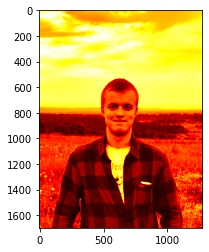

"\n'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', \n'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', \n'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',\n 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', \n 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',\n'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r',\n'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',\n'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',\n 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', \n 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r'

In [31]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('bird.jpg')

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('hot')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r',
'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',
 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 
 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean'...
'''


Now, we will experiment using an edge detector kernel.

In [0]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

In [0]:

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


If we change the kernel and start to analyze the outputs we would be acting as a CNN. The difference is that a Neural Network do all this work automatically (the kernel adjustment using different weights). In addition, we can understand how biases affect the behaviour of feature maps

<b>Please note that when you are dealing with most of the real applications of CNNs, you usually convert the pixels values to a range from 0 to 1. This process is called normalization.</b>

In [44]:
print(type(grad))

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255
grad_biases = grad_biases/255


<class 'numpy.ndarray'>


In [0]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

Let's see an example of a digit


In [0]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg    


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7F5E47640208> 


After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Input image converted to gray scale: 



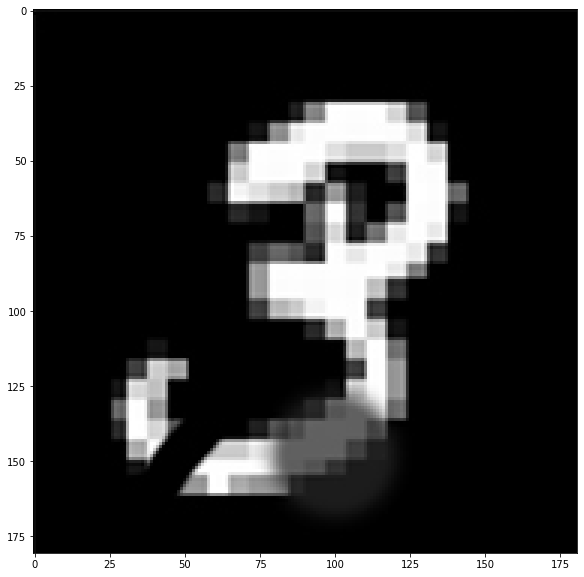

In [46]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('num3.jpg')

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Using the edge detector


GRADIENT MAGNITUDE - Feature map


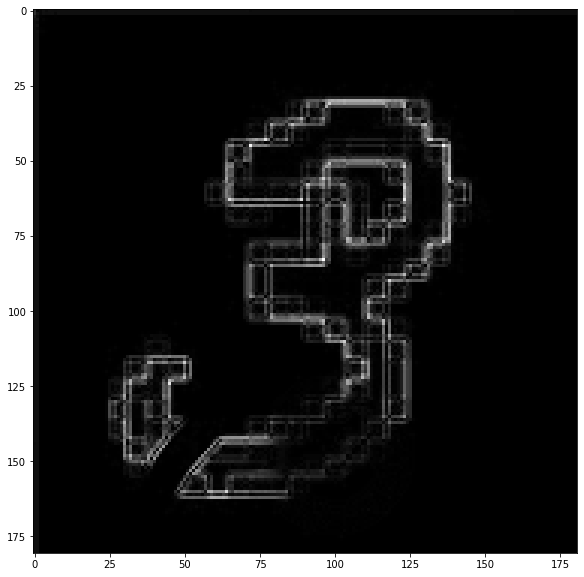

In [47]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


In [0]:
kernel = np.array([
                        [ 0, -1, 0],
                        [ -1, 0, -1],
                        [ 0, -1, 0],
                                     ]) 

grad1 = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


Created by <a href="https://linkedin.com/in/saeedaghabozorgi"> Saeed Aghabozorgi </a> , <a href="https://ca.linkedin.com/in/rafaelblsilva"> Rafael Belo Da Silva</a><br />
